<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, <br/>Analysis and Security</h1>

<h1 align='center'>Final Exam 1 - Semester 1, 2020</h1>


*****


## Instructions

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weightage**           |  **50%** of the Total Course Grade
|  **Duration**            |  **15 min** Reading + **180 min** Typing
|  **Permitted Material**  |  **Open Book**

### General Instructions
* Save, Commit (and Push) your changes frequently, so that you do not lose your work.  Do not change the names of the directories or of the files.

### Code Instructions
* You can import any additional Python modules you may need for your analysis in the first code block. **DO NOT** install any modules other than those present in the Anaconda distribution. 
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.
* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 

### Written Answer Questions
* You will be marked on the **correctness**, **depth** and **clarity** of your written answers. If your marker cannot understand your answer, marks may be deducted.
* Avoid long-winded answers and give precise answers. Answers should be clear and legible.

In [2]:
# Important Imports for the question/s
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, MeanShift
from sklearn.decomposition import PCA
import sklearn.metrics as skm
from scipy.stats import ttest_ind
import sqlite3
from sqlite3 import Error
plt.style.use('seaborn-notebook')
## inline figures
%matplotlib inline

# Getting rid of warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Add imports as necessary. 
# You are only allowed to use what is in the standard Anaconda installation
import os

****
## Question 1: Security _[20 marks]_ 
The following questions will cover the topic of security covered in the lectures
and labs. Please provide your written answers in the raw text boxes provided.
_Any_ external information you use **must be referenced**. Provide references
in the raw textbox and statement of originality.

### Q1.1: Super Secret
Consider the following scenario:
> Alex has designed a question for the final exam and would like to send it to Ramesh. However, he is worried about the possibility of an unauthorized person getting access to the question and leaking it before the exam. Because of this concern, he'd like to ensure that the question can only be read by Ramesh.

Assuming Alex and Ramesh haven't had any secure communications earlier, answer the following questions.

#### Q1.1.1: What options do they have to ensure the confidentiality of the exam question? Which option would you recommend they use? Explain why.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### Q1.1.2: What information do Alex and Ramesh have to exchange before the exam question can be transferred securely? Explain the secure transfer from Alex to Ramesh step by step, including what kind of encryption algorithms and keys are used.
<span style= 'float: right;'><b>[8 marks]</b></span>

### Q1.2: Replaced?
Given established and secure _public key_ systems like RSA, are _secret key_ systems like AES at all useful? Briefly explain.
<span style= 'float: right;'><b>[4 marks]</b></span>

### Q1.3: Hot Hashing
Tom has used a hash function to sign a message that he sends to Alice. Trudy gets hold of the signed hash. She knows that Tom has used a hash function that is not _preimage resistant_. What can Trudy do with this information?
<span style= 'float: right;'><b>[4 marks]</b></span>

****
## Question 2: Databases & SQL _[20 marks]_ 
The following questions will cover the topics of Databases & SQL covered in the
lectures and labs. Please provide your written answers in the raw text boxes
provided, and code answers in the code boxes provided.
_Any_ external information you use **must be referenced**. Provide references
in the raw textbox or code box as appropriate, and statement of originality.

### Q2.1: Structured Sanity
Consider the following scenario:
> Alex has recently taken up a position in a government organisation tracking
CAVOD-27 cases in Australia. Alex is about to publish an application that can
track when people have come into contact with others who have had the virus,
and is attempting to determine how to collect and store this data.

How structured is the data that Alex is looking to collect? Discuss what data
might be present in this process and how it could be structured, if at all.
<span style= 'float: right;'><b>[5 marks]</b></span>

### Q2.2: Nauseous North Winds
The following question is designed to test your sql skills. You have been provided a database, which you will be required to run a number of queries over. You should provide the query, and the output in an appropriate format. You may use the Pandas sql<>DataFrame functionality, or regular sqlite3 cursor functionality.

Your database looks as follows:

![nw](./img/nw.gif)


**Note:** Due to the database setup, some tables have whitespace in their names. To avoid any issues, use quotations around the table name (example below)
```sql
-- Example of use of quotation marks for handling table name
SELECT * FROM "ORDER DETAILS";
```

In [16]:
# THIS IS YOUR CONNECTION BLOCK, DO NOT MODIFY THIS. 
# OTHERWISE, YOU WILL NOT BE ABLE TO READ THE DATABASE
def create_connection(db_file):
    """ Connect to the specified SQLite database, if not exist, create a new one (in memory);
    :db_file: location of db to connect to
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Connection established!")
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

dbfile_nw = "./data/q2.db"
conn = create_connection(dbfile_nw) 
# conn.text_factory = bytes
cur = conn.cursor()
# remember to close the connection when everything is done

Connection established!


#### Q2.2.1: Dubious Discounts
Specify how many products received a discount of more than 10% when sold. In this instance, you can assume there is a 1-1 relationship between orders and products sold in an order.
<span style= 'float: right;'><b>[4 marks]</b></span>

In [10]:
def execute_sql(query):
    # Select table and display
    cur.execute(query)

    # Fetches all the rows from the result of the query
    rows = cur.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in cur.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

In [11]:
# Your Code Here
sql='select count(*) as number from Products,"Order Details" where Products.ProductID="Order Details".ProductID and Discount>0.1'
execute_sql(sql)

,number
0,472


#### Q2.2.2: Best Sellers
Assuming commission is based on 5% of the unit price of an order/productID pair, determine the amount of commission (in dollars) made by the employee with `employeeid` **1** (one). (You may assume that the unit price has already had the discount applied).
<span style= 'float: right;'><b>[5 marks]</b></span>

In [12]:
# Your Code Here
sql='select sum("Order Details".UnitPrice*0.05)  from Employees,"Order Details",Orders where Orders.OrderID="Order Details".OrderID and Employees.EmployeeID = Orders.EmployeeID and Employees."EmployeeID"=1 group by Employees.EmployeeID'
execute_sql(sql)

,"sum(""Order Details"".UnitPrice*0.05)"
0,436.622


#### Q2.2.3: Multinational
Provide a list of all the countries that are listed as customer addresses, and the number of customers in each country. Order the result based on the number of customers in each country. You may include null values. Order the list in descending order.
<span style= 'float: right;'><b>[6 marks]</b></span>

In [17]:
# Your Code Here
sql='select count(*) as num,Country  from Customers group by Customers.Country order by num desc'
execute_sql(sql)

,num,Country
0,13,USA
1,11,France
2,11,Germany
3,9,Brazil
4,7,UK
5,5,Mexico
6,5,Spain
7,4,Venezuela
8,3,Argentina
9,3,Canada


****
## Question 3: Data Analysis _[20 marks]_ 
The following questions will cover the topic of Data Analysis covered in the
lectures and labs. Please provide your written answers in the raw text boxes
provided, and code answers in the code boxes provided.
_Any_ external information you use **must be referenced**. Provide references
in the raw textbox or code box as appropriate, and statement of originality.

### 3.1: Modeling the Ideal Model

Consider the following scenario:
> While you're working at a consulting firm, one of your colleagues, Afzal, created a machine learning model for a real estate agent client to predict the price of a house.
>
> The data initially contains data from 10,000 houses. Each house has information such as:
> - number of bedrooms
> - number of bathrooms
> - size of the land in square meters ($m^2$)
> - the year the house was built
> - suburb name (eg. "Acton", "Gungahlin", "Holder")
> - the price in thousands of dollars (\\$000's)
> - 3 other relevant details (you may assume all of these other values are numerical)
> 
> Some of the data is missing - for example, for many old houses, the year that the house was built is unknown so the entry is "NaN" for this value.
>
> Afzal creates the model by:
> - Dropping all rows where any of the values are "NaN". This reduces the number of houses to 6,740.
> - Recoding the suburb name alphabetically using Label Encoding (eg. Acton as 1, Aranda as 2, ..., Woden as 46, Wright as 47, etc).
> - Using all of the data (except for the house price column, of course!), Afzal fits the model using a linear regression model.
> - He reports the coefficients for the model - some are positive and some are negative. In particular, the intercept is a negative number.
> - He also reports the score of his model using all of the data, and gets an R^2 score of 0.923 and a Mean-Squared Error (MSE) of 48,030. He shows these scores to your boss and explains that a score of 0.923 is great!
>
> Your boss is very impressed by Afzal's model, and is just about to present it to the client. However, you suspect that there's something wrong here.

Clearly describe each issue in the process of this model creation, why this is an issue in a general context when creating a machine learning model (not just in this scenario), and what you would do instead in this scenario.

If you find that there are more than 3 issues, only discuss the biggest 3 issues. For each issue, use a new raw text box and provide your response regarding that issue in that text box. Be sure to state all assumptions.
<span style= 'float: right;'><b>[10 marks]</b></span>

### 3.2: Rough Time in the Rumble
The Royal Rumble Dataset from Assignment 2 has made a return. As a reminder, you have a number of csvs in the following format:

| Field             | Description |
| :---------------  | ---------: |
| Draw          | The number of the entrant |
| Entrant       | The Entrant's name        |
| Brand         | Brand division, only exists in files for 2003-2011 and 2017 or later |
| Order         | The position of which the entrant was eliminated. A Winner will have the order of `-` |
| Eliminated by | Name of the entrant who eliminated them<br>This may be multiple entrants, in which case it is semicolon-delimited (';')<br>If this is "Winner", then this indicates that the entrant won the event (never eliminated) |
| Time          | The amount of time (in minutes) the entrant was in the match<br>If this is '00:00', don't include them as a participant in the match; the reason will be given in `Eliminated by` |
| Eliminations  | The number of entrants they eliminated |


The following questions are designed to test your data analysis skills.

#### 3.2.1: The Entrances
Import all the datasets (available in `./data/q3`), providing two dataframes of the entire rumble history: one for female matches and one for male matches. Add a column that specifies the year of the row.  At the end of this question, your two dataframes should match the following schema (one for males, one for females):

| Draw | Entrant | Brand/Status | Order | Eliminated by | Time | Elimination(s) | Year |
| :--- | :------ | :---- | :---- | :------------ | :--- | :----------- | :--- |
| 1    | Brock Lesnar | Raw | 14 | Drew McIntyre | 26:24| 13           | 2020 |
| 1    | Bret Hart | No Data | 8 | Don Muraco | 25:42 | 1 | 1988 |

Note: For any column, where you do not have the data, you may fill that in as "No Data". You also don't have to sort by Draw, this is simply showing an example of a "No Data" column.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [5]:
# Your Code Here
file_dir = "./data/q3"  # file directory
all_csv_list = os.listdir(file_dir)  # get csv list
f1,f2 = True,True
for single_csv in all_csv_list:
    path = os.path.join(file_dir, single_csv)
    name = single_csv.split('.')[0]
    if name[-1]=='m':
        if f1:
            tmp = pd.read_csv(path, index_col=0)
            tmp['Year']  = name[:-1]
            male = tmp.copy()
            f1 = False
        else:
            tmp = pd.read_csv(path, index_col=0)
            tmp['Year']  = name[:-1]
            male = male.append(tmp.copy())
    else:
        if f2:
            tmp = pd.read_csv(path, index_col=0)
            tmp['Year']  = name[:-1]
            female = tmp.copy()
            f2 = False
        else:
            tmp = pd.read_csv(path, index_col=0)
            tmp['Year']  = name[:-1]
            female = female.append(tmp.copy())
female

,Entrant,Brand/Status,Order,Eliminated by,Time,Elimination(s),Year
Draw,,,,,,,
1,Sasha Banks,Raw,27,Brie Bella & Nikki Bella,54:46,3,2018
2,Becky Lynch,SmackDown,14,Ruby Riott,30:54,2,2018
3,Sarah Logan,SmackDown,7,Molly Holly,16:30,0,2018
4,Mandy Rose,Raw,1,Lita,03:52,0,2018
5,Lita,Free agent,3,Becky Lynch,05:51,2,2018
...,...,...,...,...,...,...,...
26,Shotzi Blackheart,NXT,23,Shayna Baszler,07:57,0,2020
27,Carmella,Smackdown,24,Shayna Baszler,06:36,0,2020
28,Tegan Nox,NXT,21,Shayna Baszler,03:50,0,2020


#### 3.2.2: Number One & Two
Naturally, you would think positions (denoted as draw) 1 (one) & 2 (two) would be the worst to have, although anything can happen. Show the 3 positions that have yielded the most winners in the **Mens** Royal Rumble Match.
<span style= 'float: right;'><b>[2 marks]</b></span>

In [ ]:
# Your Code Here


#### 3.2.3: Scared of the Ropes
Provide the 5 participants who have eliminated the least people in the **Mens** Royal Rumble. Only consider people who have participated in more than 2 events.
<span style= 'float: right;'><b>[2 marks]</b></span>

In [ ]:
# Your Code Here

#### 3.2.4: Battling Baszler & Belair
Show each participant that was eliminated by either Shayna Baszler or Bianca Belair (or both), what spot they entered in, and who eliminated them.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [ ]:
# Your Code Here

****
## Q4 - Machine Learning _[30 Marks]_
The following questions will cover the topic of Machine Learning covered in the
lectures and labs. Please provide your written answers in the raw text boxes
provided, and code answers in the code boxes provided.
_Any_ external information you use **must be referenced**. Provide references
in the raw textbox or code box as appropriate, and statement of originality.

### Q4.1: Serious about Soccer

The data is in the location `/data/q4.csv`. Your data looks as follows:

| **Name**             | **Description**                                         |
| -------------------- | ------------------------------------------------------- |
| ID             | Player ID |
| Age             | Age of player |
| Stamina                | Stamina skill value of player                           |
| Strength                | Strength skill value of player                           |
| Aggression                | Aggression skill value of player                           |
| Interceptions                | Interceptions skill value of player                           |
| Penalties                | Penality skill value of player                           |
| Composure                | Composure skill value of player                           |



In preparation for further data analysis at a later date, Ben wants to separate the soccer players into distinct groups based on their characteristics.

He has recruited you to find these groups for him, because he's heard you're good at this sort of thing. In fact, he trusts your judgement so much that he's given you (almost) total control over what sort of groups you create. His only requests are:
- Consider all the data he's giving you - try not to throw away data that he's spent time to gather, unless you've got a good reason for it.
- He doesn't want too many groups; if there's a large number of groups then it's hard for him to do group-specific data analysis later.
- While he trusts your judgement, he also wants to know what your judgement is. When you present the groups to him, he wants a description of each group and why it differs from the rest.

#### Q4.1.1: Starting Off
Start by importing the data and pre-processing it as you wish.
<span style= 'float: right;'><b>[1 mark]</b></span>

In [5]:
# Your Code Here.
data = pd.read_csv('./data/q4.csv')
data.dropna(axis=0,how='any')
data.drop_duplicates(subset=None, keep='first', inplace=True)

def separate(row):
    if row['pts']<=200:
        return 'Lowscoringplayers'
    elif row['pts']<=800:
        return 'Midscoringplayers'
    else:
        return 'highscoringplayers'
player_data['classification_player_data']=player_data.apply(separate,axis=1)


data.head()

,ID,Age,Stamina,Strength,Aggression,Interceptions,Penalties,Composure
0,158023,31,72.0,59.0,48.0,22.0,75.0,96.0
1,20801,33,88.0,79.0,63.0,29.0,85.0,95.0
2,190871,26,81.0,49.0,56.0,36.0,81.0,94.0
3,193080,27,43.0,64.0,38.0,30.0,40.0,68.0
4,192985,27,90.0,75.0,76.0,61.0,79.0,88.0


#### Q4.1.2: Stick Together
Now get to work on creating your grouping. Include a visualisation of your groupings as well, so Ben can easily see how these players' stats differ on a graph.

**Note:** To ensure your analysis is consistent during marking, you should set a random seed before grouping.
<span style= 'float: right;'><b>[5 marks]</b></span>

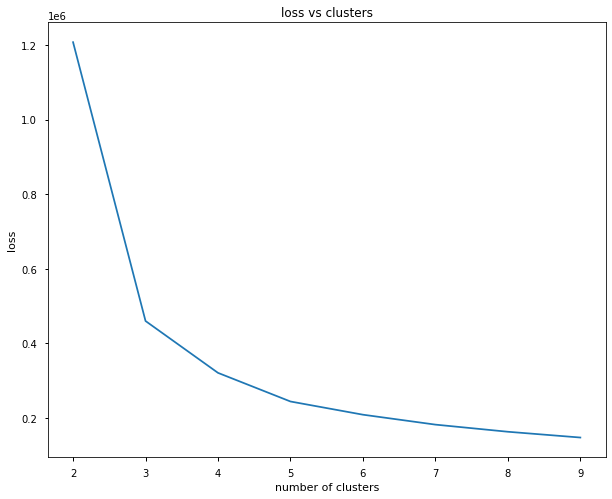

In [6]:
# Your Code Here
loss = []

for i in range(2,10):
    dataSet = data[['Age','Stamina','Strength','Aggression','Interceptions','Penalties','Composure']].copy()
    # PCA
    pca = PCA(n_components=2)
    dataSet = pca.fit_transform(dataSet)
    
    kmeans = KMeans(n_clusters=i, random_state=0 ,max_iter =50).fit(dataSet)
    center = kmeans.cluster_centers_
    labels = kmeans.labels_
    loss.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
plt.title('loss vs clusters')
plt.xlabel('number of clusters')
plt.ylabel('loss')
plt.plot([i for i in range(2,10)],loss)

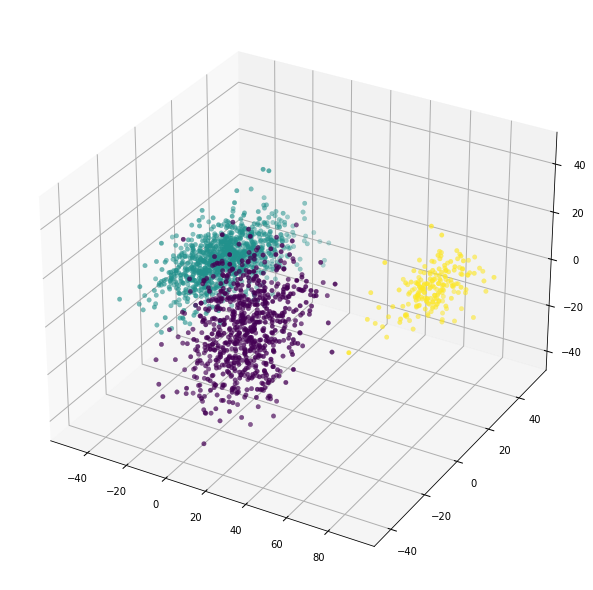

In [7]:
dataSet = data[['Age','Stamina','Strength','Aggression','Interceptions','Penalties','Composure']].copy()
pca = PCA(n_components=3)
dataSet = pca.fit_transform(dataSet)
kmeans = KMeans(n_clusters=3, random_state=0 ,max_iter =50).fit(dataSet)
center = kmeans.cluster_centers_
labels = kmeans.labels_
# labels


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.scatter(dataSet[:,0], dataSet[:,1],  dataSet[:,2], c=labels)

# accuracy_score(y_true, y_pred) # Show accuracy
# f1_score(y_true, y_pred, average='macro') # f1
plt.show()

#### Q4.1.3: Presentation Prep

Before you present your groupings to Ben, you should justify your findings.
- First, print relevant statistics on each grouping and ensure that the output is easy to read and compare - you may find it useful to use a visualisation, but this isn't necessary for full marks.
- Second, for each group, give a brief description (~30 words or less each) on what differentiates it from the rest of the groups.
- Finally, give a brief justification as to why you settled on this grouping. If you excluded any data, explain why.
<span style= 'float: right;'><b>[9 marks]</b></span>

In [11]:
# Your Code Here
for i in range(3):
    print(data[labels==i].mean())

<class 'numpy.ndarray'>
ID               197693.426997
Age                  26.873278
Stamina              72.017906
Strength             66.059229
Aggression           60.201102
Interceptions        37.851240
Penalties            70.084022
Composure            75.201102
dtype: float64
ID               198094.848007
Age                  27.095459
Stamina              76.480074
Strength             74.024096
Aggression           76.256719
Interceptions        75.730306
Penalties            55.237257
Composure            73.784059
dtype: float64
ID               182295.225641
Age                  29.317949
Stamina              35.292308
Strength             67.564103
Aggression           30.430769
Interceptions        20.487179
Penalties            22.353846
Composure            57.702564
dtype: float64


#### Q4.1.4: Not so Close!

Finally, based on your visualisation, statistical output and descriptions, find the two groupings that look most alike - if there are many that are similar, choose any of these pairs.

To justify to Ben that this pair of groups should be separate and that they shouldn't be combined into one group, show that these groups have a statistically significant difference between them in one of the player attributes.

**Side Note:** A hypothesis test on one attribute doesn't indicate that the clusters as a whole should be separate, but Ben is happy to use this as justification.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [15]:
# Your Code Here
from scipy import stats
N = 20
Stamina1 = np.random.choice(data[labels==0]['Stamina'],N)
Stamina2 = np.random.choice(data[labels==2]['Stamina'],N)
vara = stats.ttest_ind(Stamina1,Stamina2)

print('o_codec:',vara)

o_codec: Ttest_indResult(statistic=20.238645653720454, pvalue=5.742070560921788e-28)


# Your answer here
# t test
## H_0: Suppose that the cluster 0 and cluster 2 should be the same, the difference above are because of sampling deviation.

## H_1: 

## p_value < 0.05 so H_0 refused.

### Q4.2: Troublesome Theory

#### Q4.2.1: Tumultuous Testing
Consider the following scenario:
> Alex is currently using a Machine Learning model to predict whether a student will pass or fail, based on their lab attendance. However, depending on how his data is split when he uses `train_test_split`, the accuracy of the model is varied highly.

What is the problem here and how could he account for this? Provide an example of a tool or procedure he could use to solve this issue and ensure the accuracy is representative of the dataset.
<span style= 'float: right;'><b>[5 marks]</b></span>

#### Q4.2.2: Silly Scoring
Consider the following scenario:
> Ben is currently working for Blume, using items such as Name, Date of Birth, employment, and income to predict how likely someone is to ask for a payrise.

Disregarding the potential ethical issues with this, should Ben be using a classification or regression model? What would be the impact of using the incorrect model?
<span style= 'float: right;'><b>[5 marks]</b></span>

****
## Q5 - Ethics _[10 Marks]_
The following questions will cover topics of ethics covered in the lectures
and labs. Please provide your written answers in the raw text boxes provided.
_Any_ external information you use **must be referenced**. Provide references
in the raw textbox and statement of originality.

### Q5.1: Ethical Issues
Discuss two **Economical** ethical issues (as defined in the lectures)
that may arise from the use of Data Analytics, and what impact this may have
on workers, or the wider community. Provide an example and outline the impact
this example could have.
<span style= 'float: right;'><b>[5 marks]</b></span>

### Q5.2: The Value of Data
Discuss two of ways the value of **Confidentiality** can be harmed by
Data Analytics. Provide an example of each.
<span style= 'float: right;'><b>[5 marks]</b></span>

****
Congratulations, you have made it to the end. Don't forget to save, fill out your statement of originality, commit & finally push your work to your repo.